In [1]:
import pandas as pd

file = 'data/evaluations.csv'
conversion_dict = {'research_type': lambda x: int(x == 'E')}
evaluation_data = pd.read_csv(file, sep=',', header=0, index_col=0, converters=conversion_dict)

evaluation_data = evaluation_data.groupby('research_type').get_group(1)
print('Experimental samples per conference\n{}'.format(evaluation_data.groupby('conference').size()))

Experimental samples per conference
conference
AAAI 14     85
AAAI 16     85
IJCAI 13    71
IJCAI 16    84
dtype: int64


In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

%matplotlib notebook
matplotlib.style.use('ggplot')

def plot_bars(
        data,
        category_label,
        figsize=(4,4),
        cmap=matplotlib.cm.get_cmap('RdYlBu_r')):
    plt.figure(figsize=figsize)
    axes = data.plot.bar(rot=0, alpha=0.75)
    col = np.arange(0, data.count()) / (data.count() - 1.0)
    patches = list(filter(lambda x:
            isinstance(x, matplotlib.patches.Rectangle),
            axes.get_children()))
    for c, p in zip(reversed(col), patches):
        plt.setp(p, 'facecolor', cmap(c))
    plt.ylabel('# of papers')
    plt.xlabel('{} variables covered'.format(category_label))
    for label, rect in zip(data.values, patches):
        height = rect.get_height()
        axes.text(rect.get_x() + rect.get_width()/2, height,
                label, ha='center', va='bottom')
    plt.tight_layout()
    plt.show()
    plt.savefig('figures/coverage_{}.png'.format(category_label.lower()),
            format='png', bbox_inches='tight')

0     67
1    125
2    102
3     28
4      3
5      0
dtype: int64


<IPython.core.display.Javascript object>


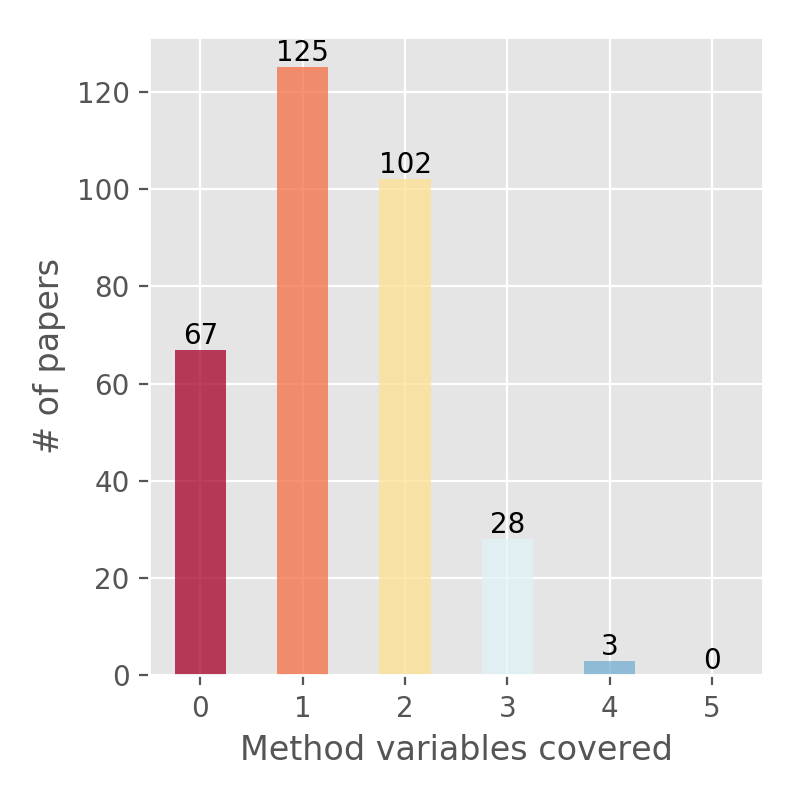

In [3]:
method = ['problem_description','goal/objective','research_method',
        'research_question','pseudocode']
method_coverage = (evaluation_data[method].sum(axis=1)
        .value_counts()
        .reindex(index=range(0, len(method) + 1), fill_value=0))
print(method_coverage)
plot_bars(method_coverage, 'Method')

0    167
1     95
2     42
3     20
4      1
dtype: int64


<IPython.core.display.Javascript object>


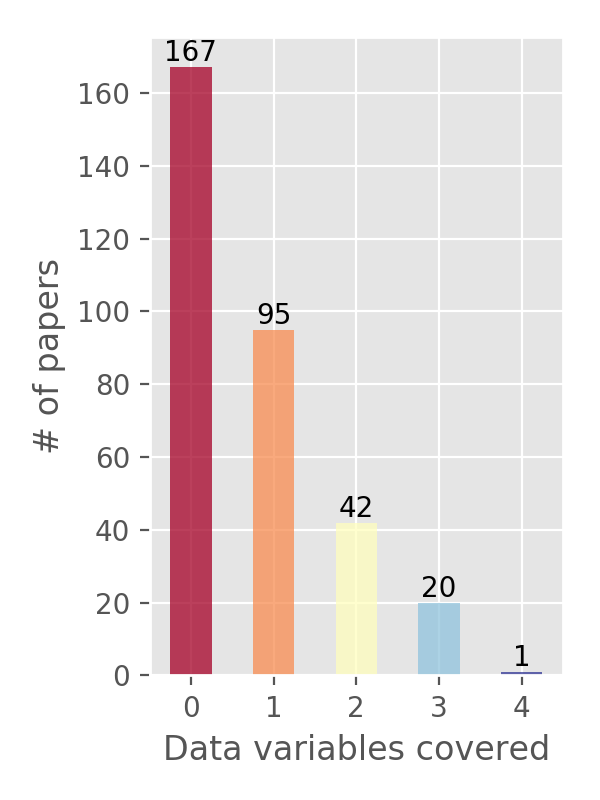

In [4]:
data = ['train', 'validation', 'test', 'results']
data_coverage = (evaluation_data[data].sum(axis=1)
        .value_counts()
        .reindex(index=range(0, len(data) + 1), fill_value=0))
print(data_coverage)
plot_bars(data_coverage, 'Data', figsize=(3,4))

0     42
1     97
2    107
3     57
4     13
5      7
6      2
7      0
8      0
dtype: int64


<IPython.core.display.Javascript object>


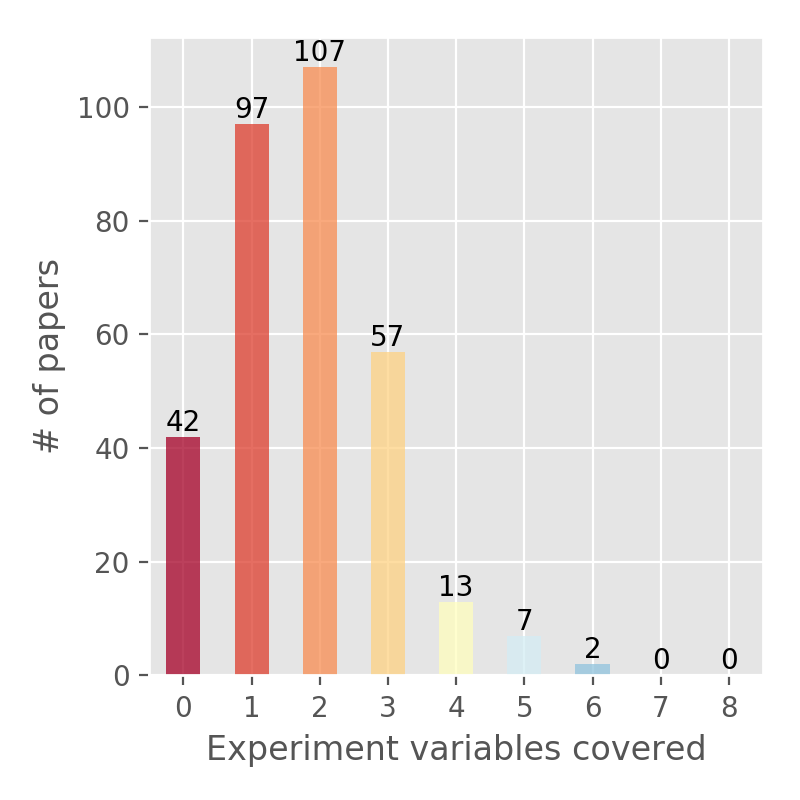

In [5]:
experiment = ['hypothesis', 'prediction',
        'open_source_code', 'open_experiment_code',
        'hardware_specification', 'software_dependencies',
        'experiment_setup', 'evaluation_criteria']
experiment_coverage = (evaluation_data[experiment].sum(axis=1)
        .value_counts()
        .reindex(index=range(0, len(experiment) + 1), fill_value=0))
print(experiment_coverage)
plot_bars(experiment_coverage, 'Experiment')

In [6]:
import IPython
import platform

print('Python version: {}'.format(platform.python_version()))
print('IPython version: {}'.format(IPython.__version__))
print('matplotlib version: {}'.format(matplotlib.__version__))
print('numpy version: {}'.format(np.__version__))
print('pandas version: {}'.format(pd.__version__))

Python version: 3.5.3
IPython version: 6.1.0
matplotlib version: 2.0.2
numpy version: 1.13.1
pandas version: 0.20.3
